# **This is the 1+1+1=3 adder**

## Making the necessary imports

In [2]:
#import qiskit tools
import qiskit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile, Aer, IBMQ
from qiskit.tools.visualization import circuit_drawer
from qiskit.tools.monitor import job_monitor, backend_monitor, backend_overview
from qiskit.providers.aer import noise

#import python stuff
import matplotlib.pyplot as plt
from qiskit.visualization import plot_histogram
import numpy as np
import time

## Loading the account

In [7]:
#IBMQ.delete_account()
IBMQ.save_account('7d8a2b3e50702a93549aef58c63889439f2097b22aa826ddd3288b29ec6e0c39323697aec7a13cc6ebcad9b54ea264568443bd100b6b22807075618946ee8724', overwrite=True)
#IBMQ.enable_account(my_api)
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
quito = provider.get_backend('ibmq_quito')

## Making the adder circuit

In [8]:
qreg_q = QuantumRegister(5, 'q')
creg_c = ClassicalRegister(5, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.reset(qreg_q[0])
circuit.reset(qreg_q[1])
circuit.reset(qreg_q[2])
circuit.cx(qreg_q[0], qreg_q[3])
circuit.cx(qreg_q[1], qreg_q[3])
circuit.cx(qreg_q[2], qreg_q[3])
circuit.ccx(qreg_q[0], qreg_q[1], qreg_q[4])
circuit.ccx(qreg_q[2], qreg_q[0], qreg_q[4])
circuit.ccx(qreg_q[1], qreg_q[2], qreg_q[4])
circuit.measure(qreg_q[3], creg_c[3])
circuit.measure(qreg_q[4], creg_c[4])

## Visualizing the adder circuit

In [9]:
circuit.draw()

q_0: ─|0>───■──────────────■────■─────────────
            │              │    │             
q_1: ─|0>───┼────■─────────■────┼───────■─────
            │    │         │    │       │     
q_2: ─|0>───┼────┼────■────┼────■───────■─────
          ┌─┴─┐┌─┴─┐┌─┴─┐  │    │  ┌─┐  │     
q_3: ─────┤ X ├┤ X ├┤ X ├──┼────┼──┤M├──┼─────
          └───┘└───┘└───┘┌─┴─┐┌─┴─┐└╥┘┌─┴─┐┌─┐
q_4: ────────────────────┤ X ├┤ X ├─╫─┤ X ├┤M├
                         └───┘└───┘ ║ └───┘└╥┘
c: 5/═══════════════════════════════╩═══════╩═
                                    3       4

## Fetching the counts

In [10]:
tic = time.time()
transpiled_circuits = transpile(circuit, quito)
job_real = quito.run(transpiled_circuits, shots=8192)
job_monitor(job_real)
result_real = job_real.result()
toc = time.time()

Job Status: job has successfully run


## Making a histogram

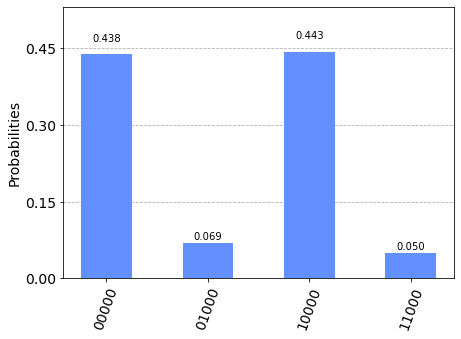

In [11]:
counts = result_real.get_counts()
plot_histogram(counts)